In [1]:
import numpy as np
import tensorflow

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

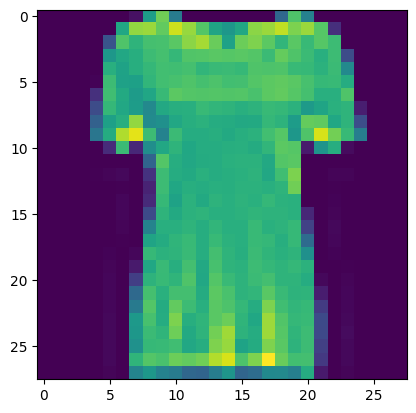

In [7]:
import matplotlib.pyplot as plt
for i in range(1,11):
    plt.imshow(X_train[i])

In [71]:
# Normalize & reshape
x_train = X_train.astype("float32") / 255.0
x_test = X_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)   # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1) 

In [72]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
# Model Building

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout


In [74]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


c:\Users\GrowTech\Desktop\Data Science 16\Batch17GrowTechDS\Machine learning\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,642 (1.55 MB)

 Trainable params: 404,746 (1.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [76]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5)

In [78]:
history = model.fit(X_train,y_train,
                    epochs = 50,
                    validation_data = (X_test,y_test),
                    callbacks = [early_stop])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.7801 - loss: 0.6167 - val_accuracy: 0.8532 - val_loss: 0.4027
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.8429 - loss: 0.4301 - val_accuracy: 0.8475 - val_loss: 0.4028
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.8598 - loss: 0.3865 - val_accuracy: 0.8576 - val_loss: 0.3708
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.8687 - loss: 0.3577 - val_accuracy: 0.8729 - val_loss: 0.3388
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8754 - loss: 0.3395 - val_accuracy: 0.8801 - val_loss: 0.3261
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.8803 - loss: 0.3237 - val_accuracy: 0.8864 - val_loss: 0.3129
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.8860 - loss: 0.3120 - val_accuracy: 0.8920 - val_loss: 0.3051
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8897 -

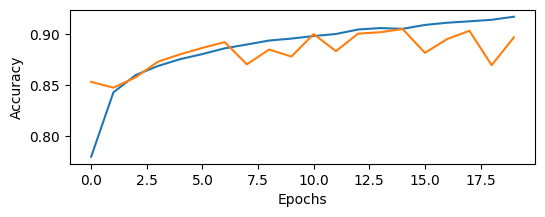

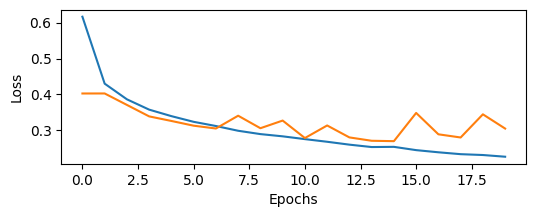

In [79]:
plt.figure(figsize=(6,2))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(6,2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [90]:
import cv2 as cv
import numpy as np
CLASS_NAMES = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# 1. Load image
image = cv.imread("Bag3.jpg")

# 2. Convert to grayscale (Fashion MNIST is grayscale)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# 3. Resize to 28x28 (same as training data)
resize_img = cv.resize(gray, (28, 28))

# 4. Normalize (scale values from 0–255 → 0–1)
resize_img = resize_img.astype("float32") / 255.0

# Invert colors if needed
resize_img = 1 - resize_img

# 5. Reshape to match model input: (1,28,28,1)
resize_img = np.expand_dims(resize_img, axis=-1)  # add channel dim
resize_img = np.expand_dims(resize_img, axis=0)   # add batch dim

# 6. Predict
pred = model.predict(resize_img)
pred_class = CLASS_NAMES[np.argmax(pred)]

print("Prediction:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: Bag
